1

In [13]:
from IPython.display import Latex

In [14]:
#Downloading dataset
from sklearn import datasets
dataset = datasets.fetch_lfw_people()
X = dataset['data']
#check data
print(X.data.shape)

(13233, 2914)


In [15]:
#Relevant imports
import matplotlib
import numpy as np
from matplotlib import pyplot
from numpy import linalg

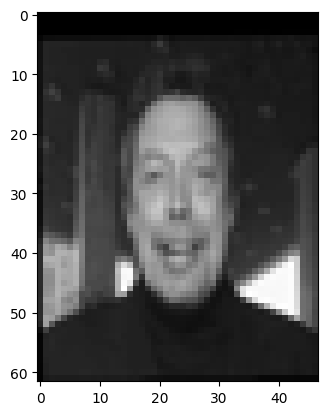

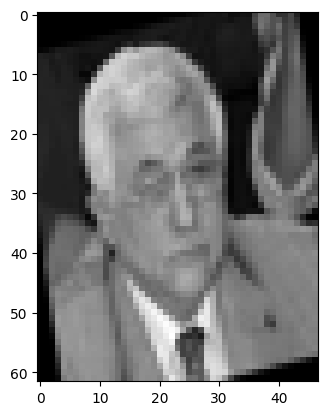

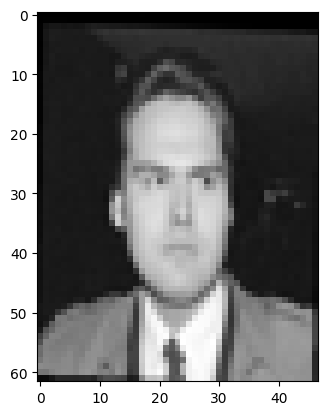

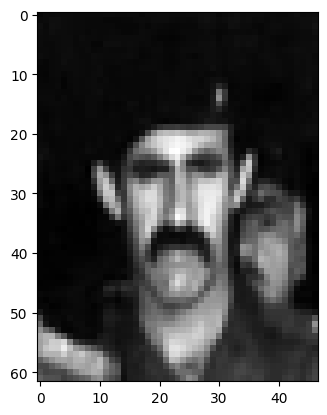

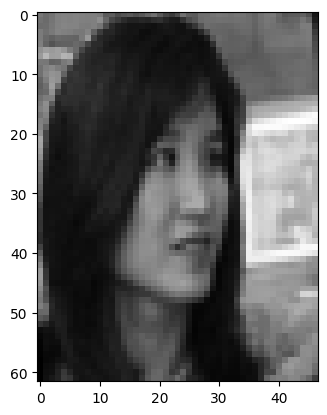

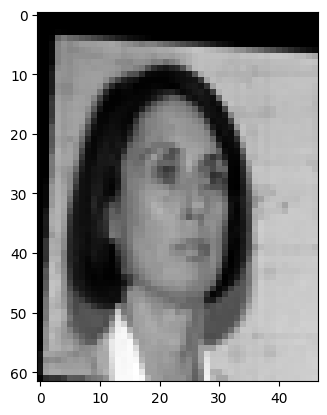

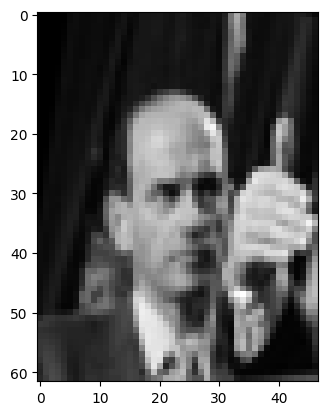

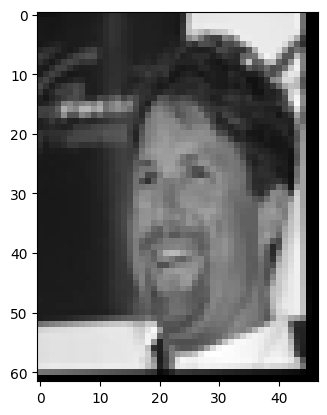

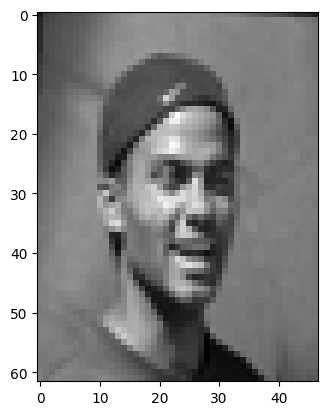

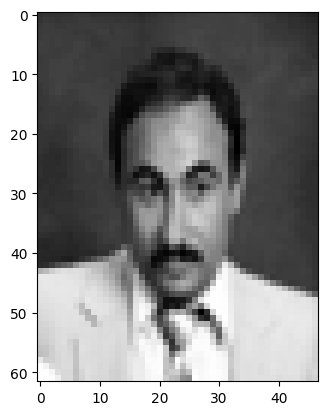

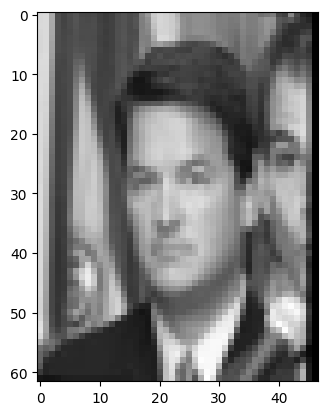

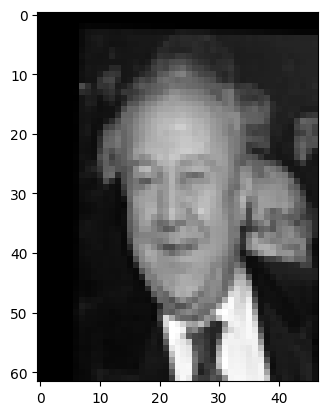

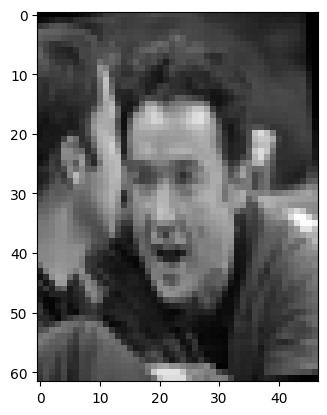

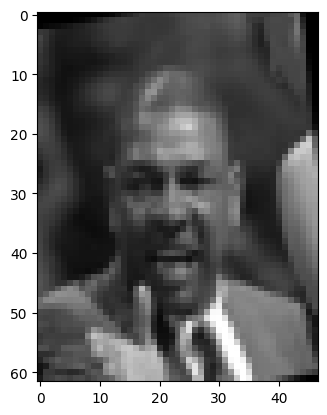

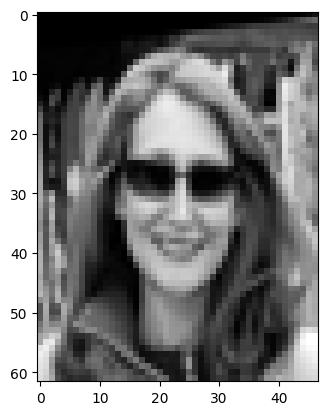

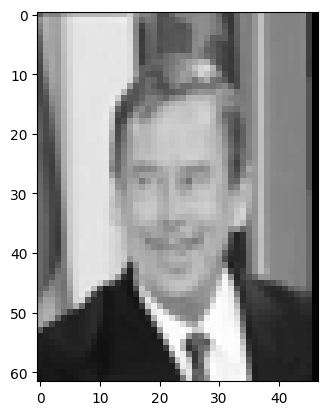

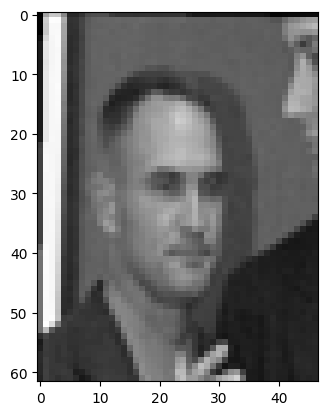

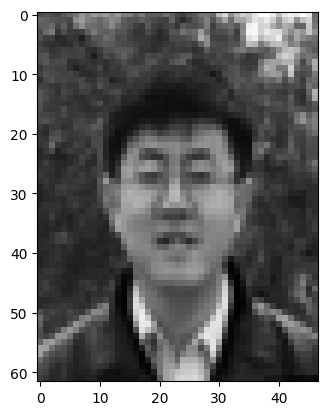

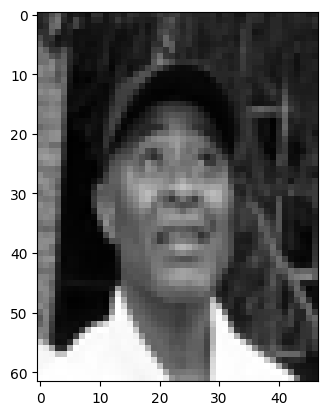

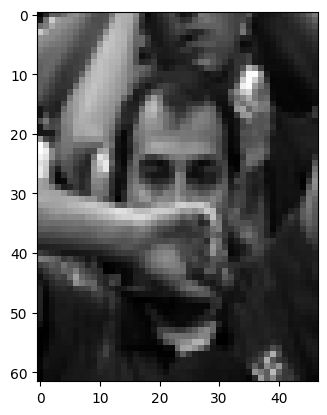

In [16]:
#1.a
for i in range(20):
    matplotlib.pyplot.imshow(X[i].reshape((62,47)), cmap=matplotlib.pyplot.cm.gray )
    matplotlib.pyplot.savefig(f'files/1_a={i}.png')
    matplotlib.pyplot.show()

In [17]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

[0.13771963 0.15683803 0.17031944 ... 0.2221487  0.20515166 0.18089974]


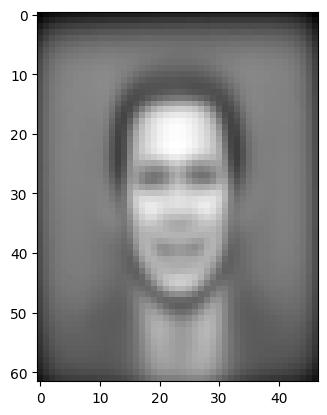

In [18]:
#1.b
average = X.mean(axis = 0)
print(average)
for i in range(X[0].size):
    X[i]-=average
matplotlib.pyplot.imshow(average.reshape((62,47)), cmap=matplotlib.pyplot.cm.gray )
matplotlib.pyplot.savefig(f'files/1_b=average.png')
matplotlib.pyplot.show()

In [19]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

In [20]:
#1.c 
eig_vectors, eig_values,_  = np.linalg.svd(X.T@X)

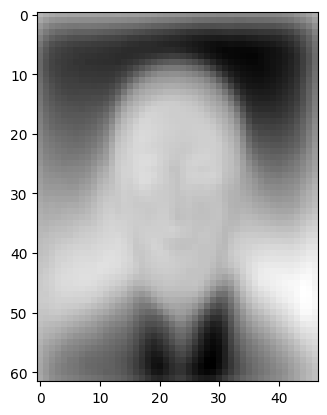

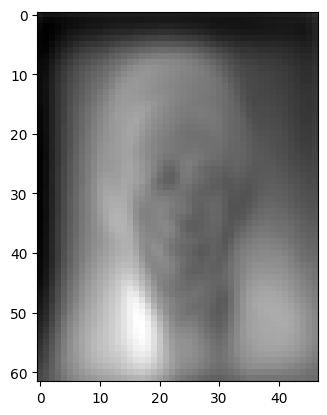

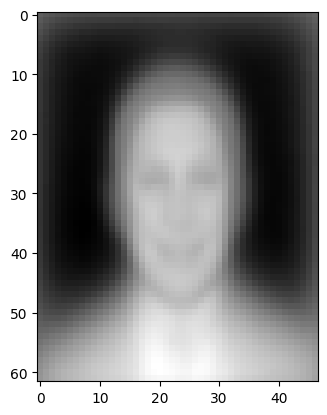

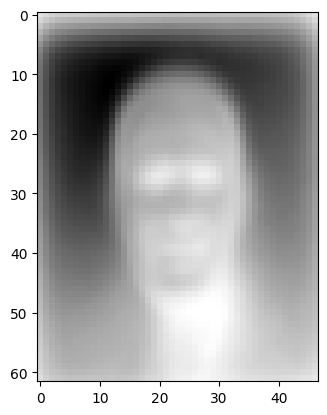

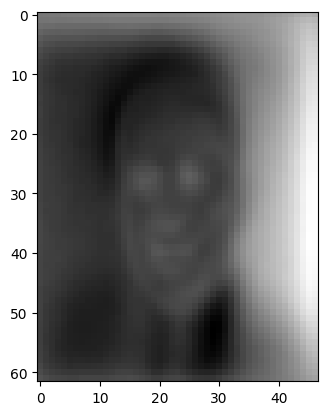

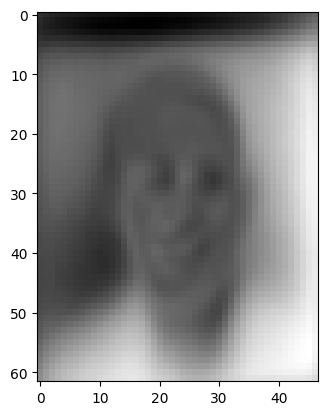

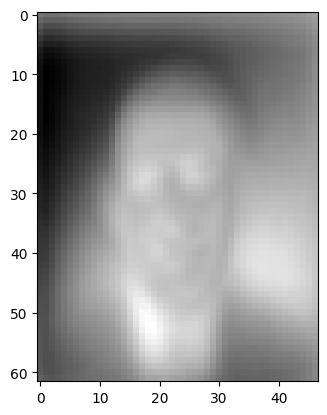

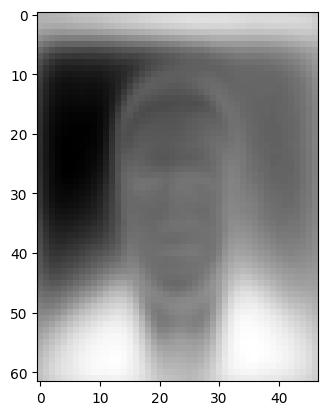

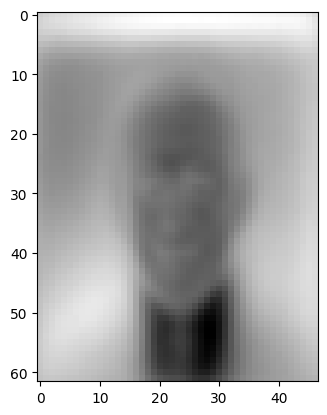

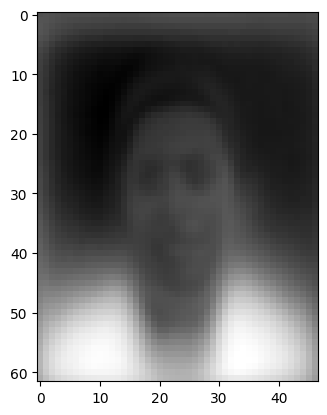

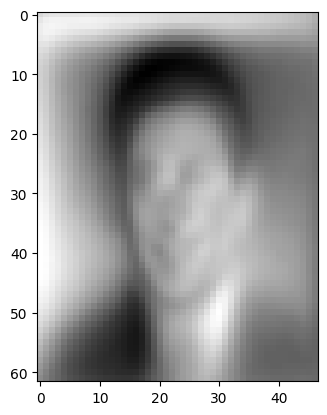

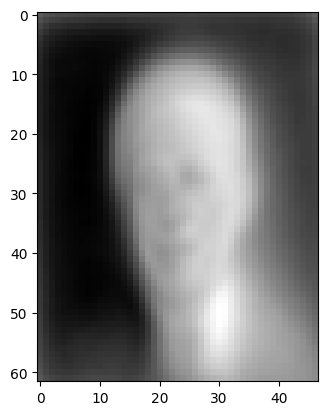

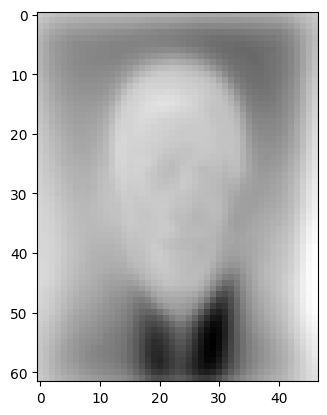

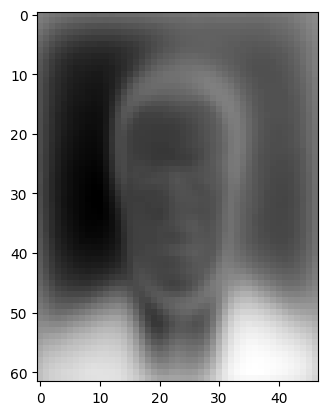

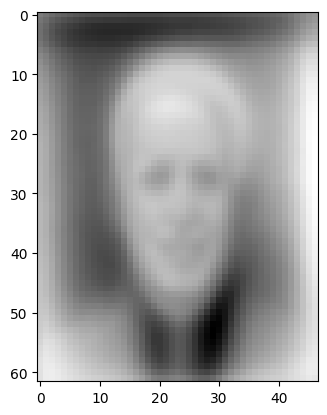

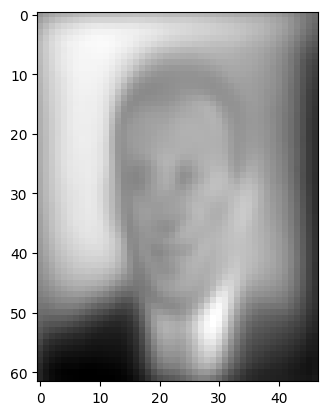

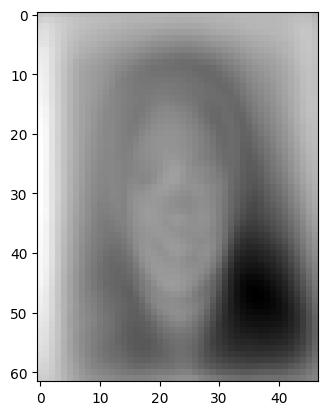

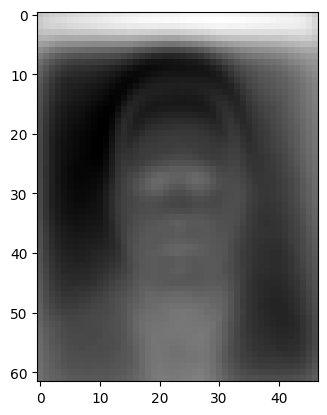

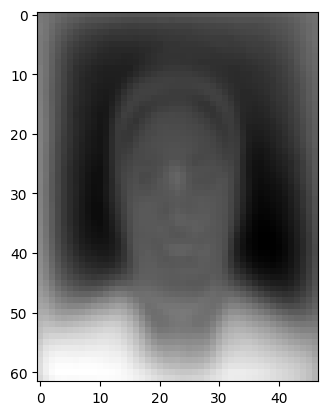

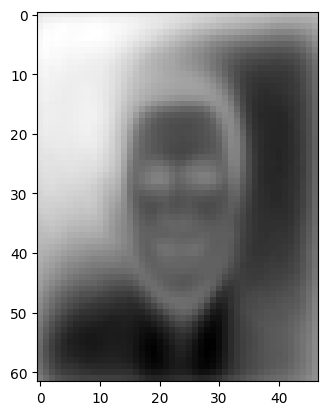

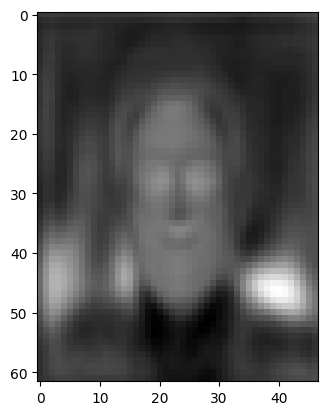

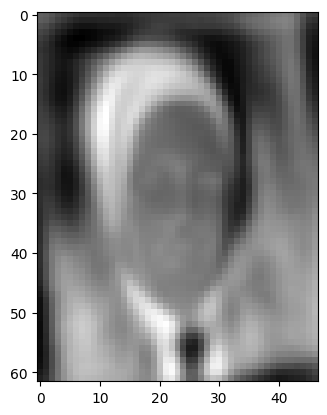

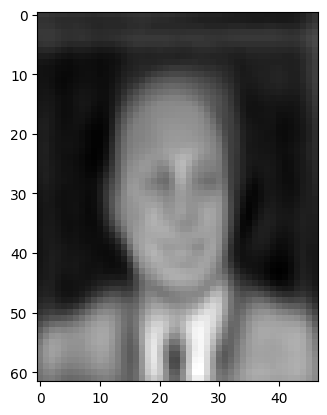

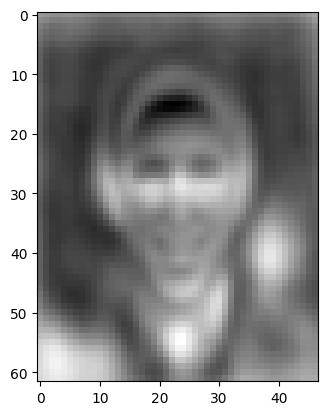

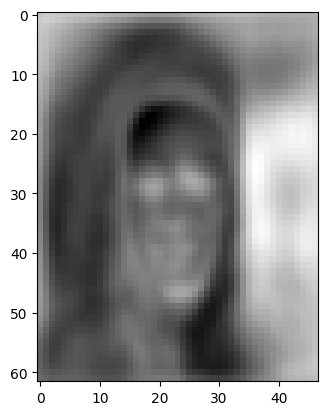

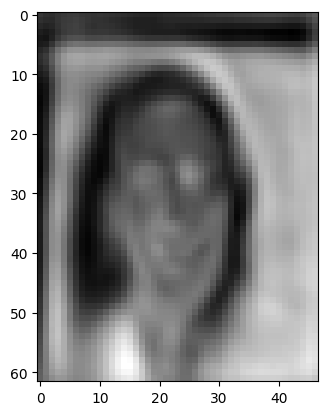

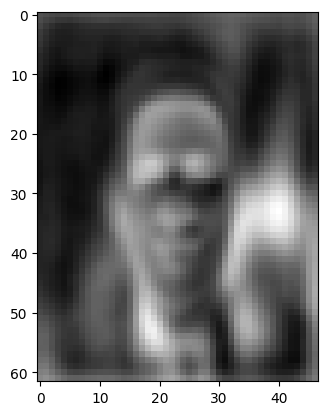

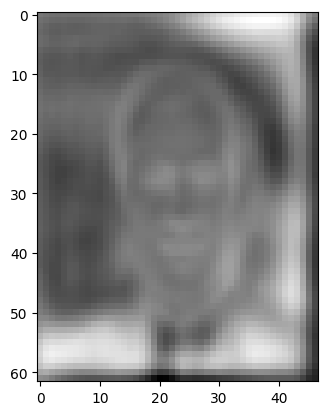

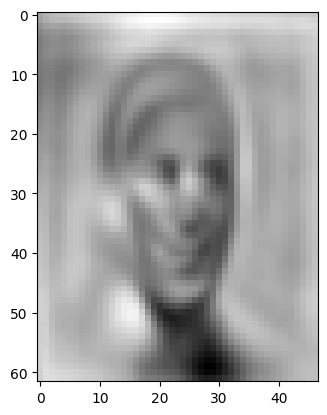

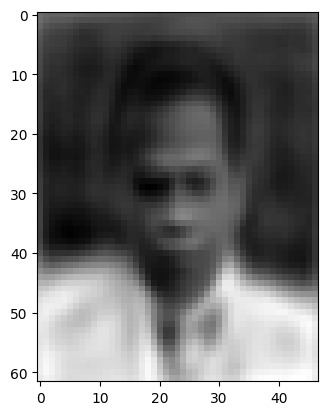

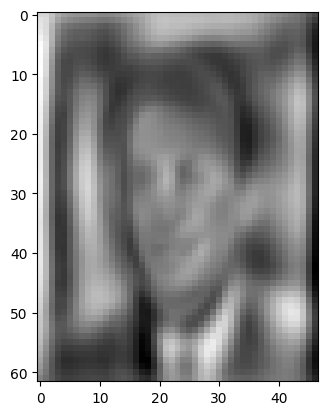

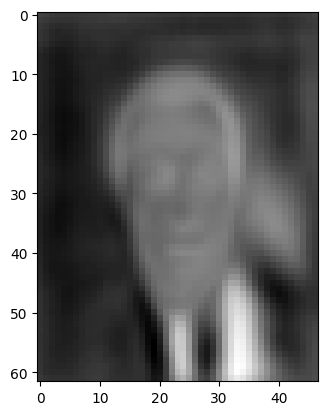

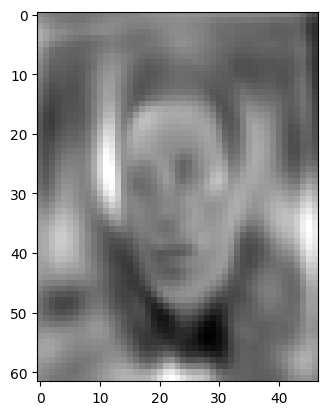

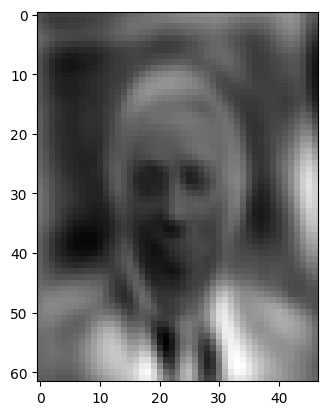

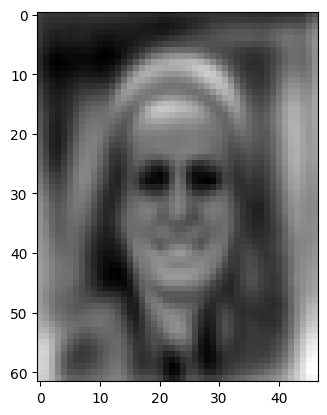

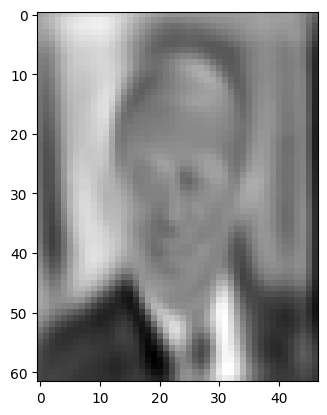

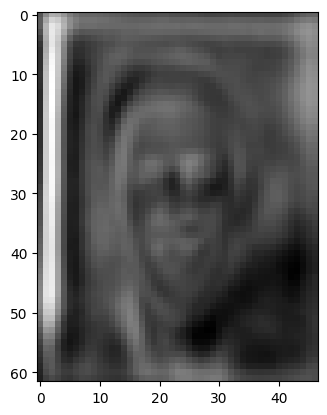

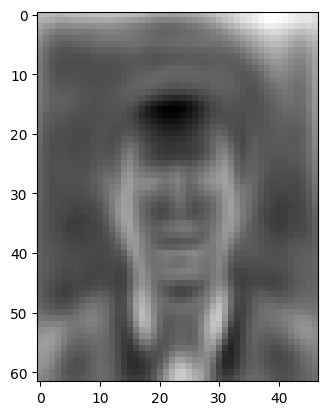

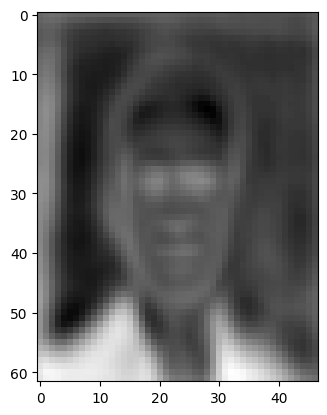

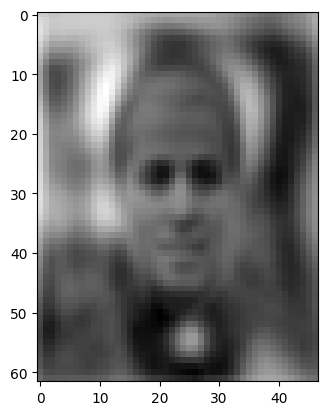

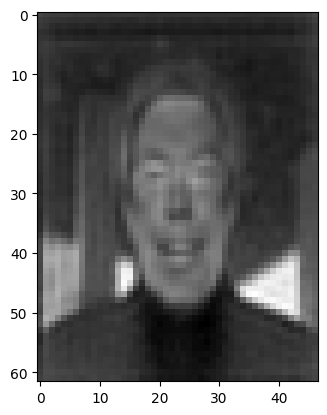

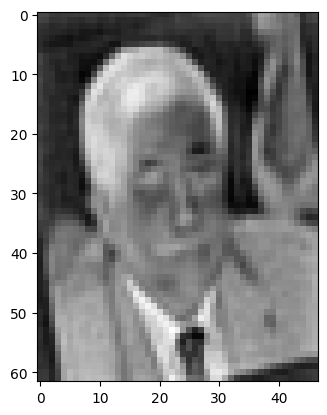

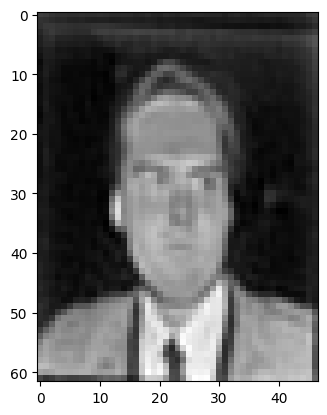

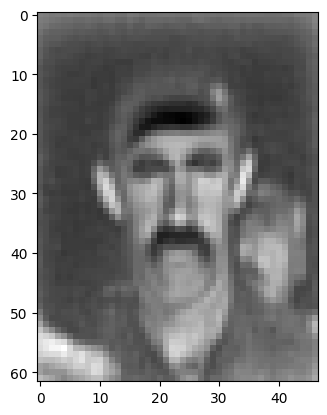

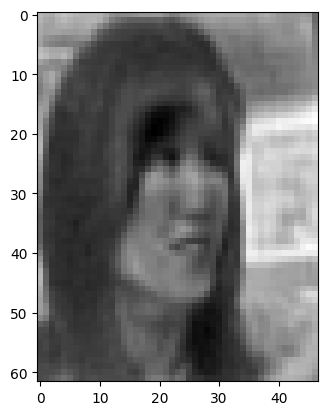

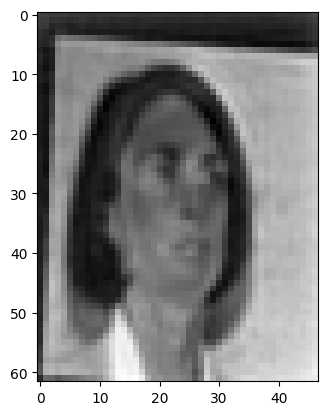

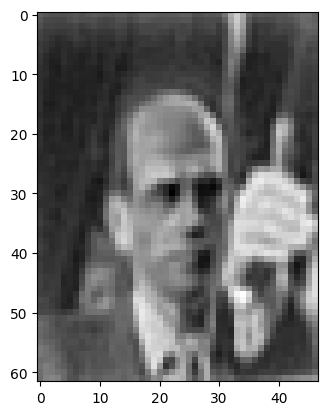

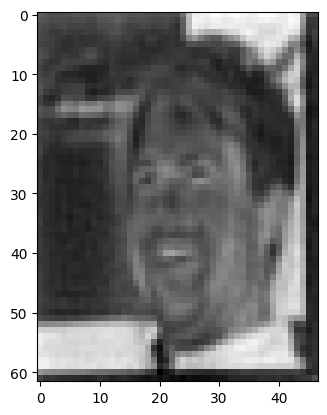

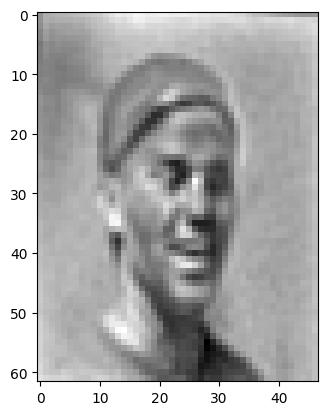

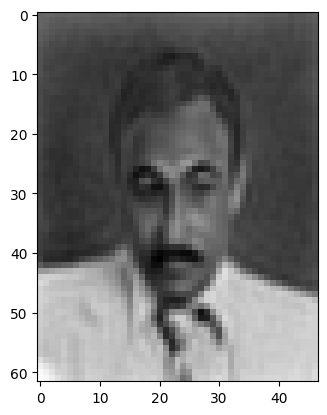

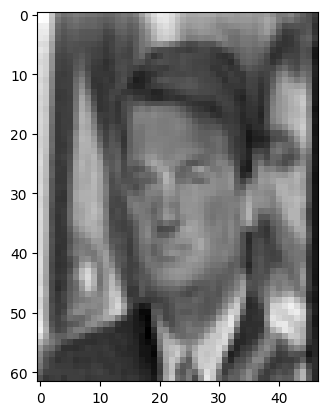

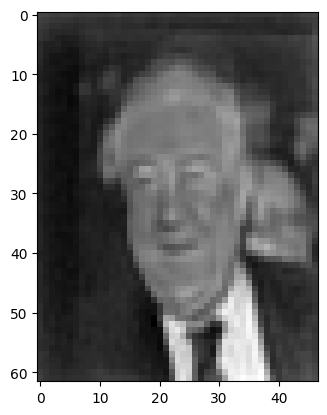

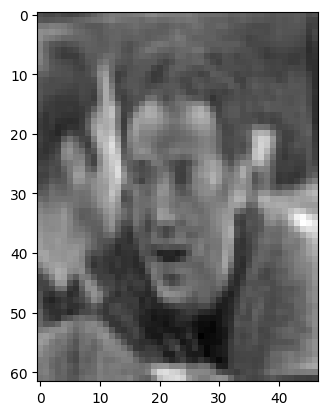

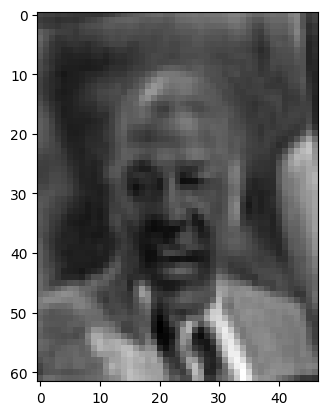

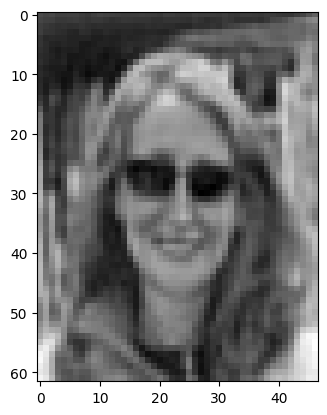

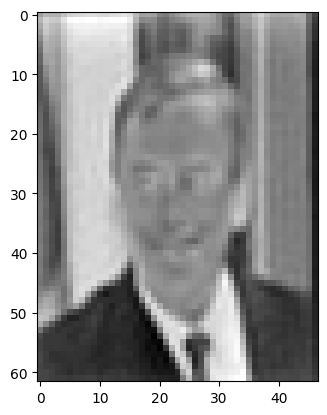

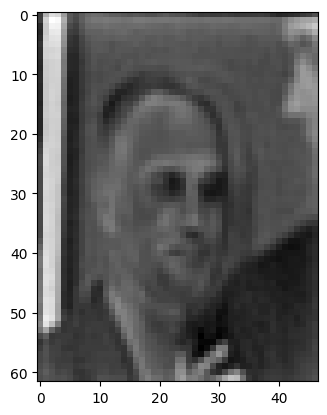

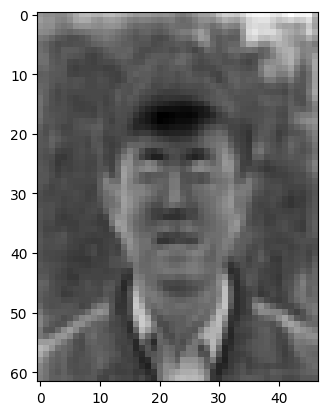

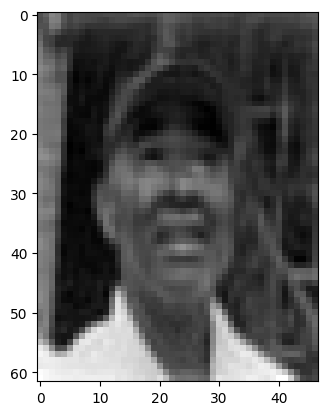

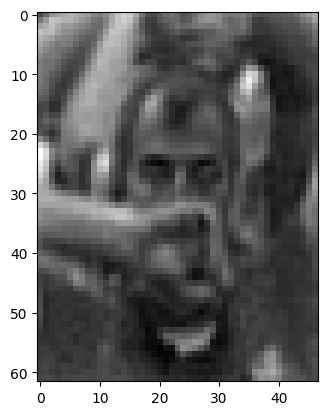

In [21]:
#1.c

def projectTopKEigenVectors(X, k, eig_values, eig_vectors):
    idx = eig_values.argsort()[::-1]
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:,idx]
    
    k_eig_vectors = np.zeros(eig_vectors.shape)
    k_eig_vectors[:,:k] = eig_vectors[:,:k]

    X_k = X @ k_eig_vectors
    X_recon = X_k @ k_eig_vectors.transpose()
    
    for i in range(20):
        matplotlib.pyplot.imshow(X_recon[i].reshape((62,47)), cmap=matplotlib.pyplot.cm.gray )
        matplotlib.pyplot.savefig(f'files/1_c_top20_nr.{i+1}_k={k}.png')
        matplotlib.pyplot.show()

projectTopKEigenVectors(X, 10, eig_values, eig_vectors)
projectTopKEigenVectors(X, 100, eig_values, eig_vectors)
projectTopKEigenVectors(X, 1000, eig_values, eig_vectors)

In [22]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

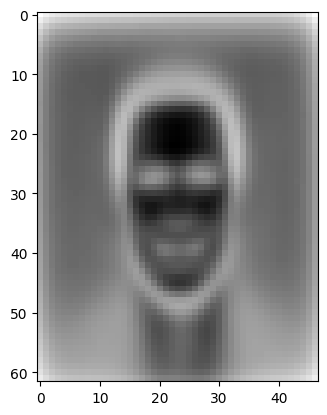

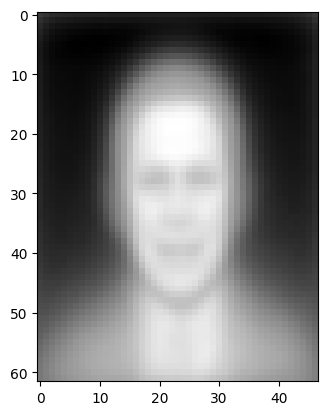

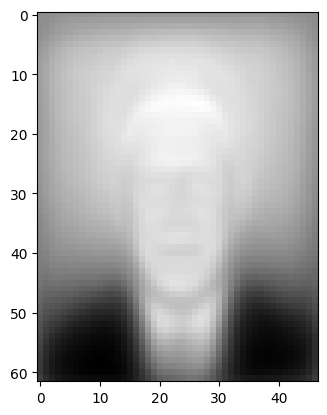

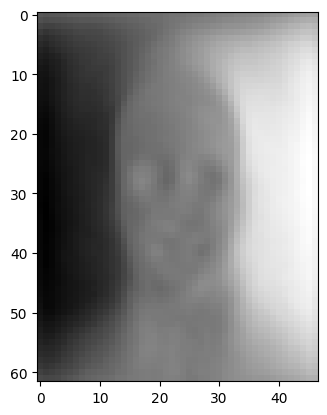

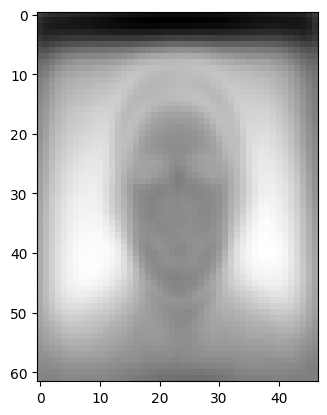

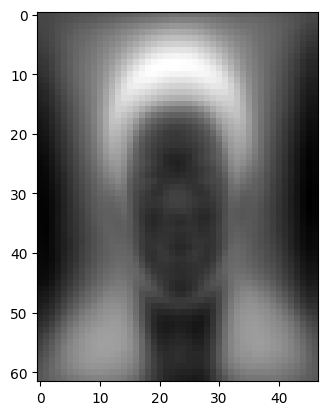

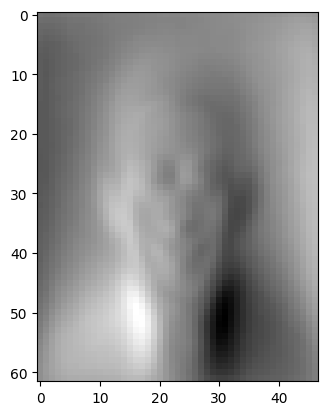

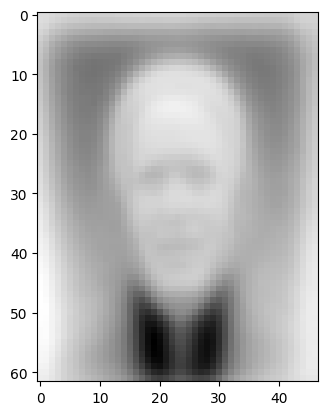

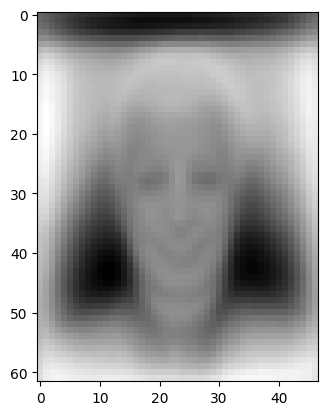

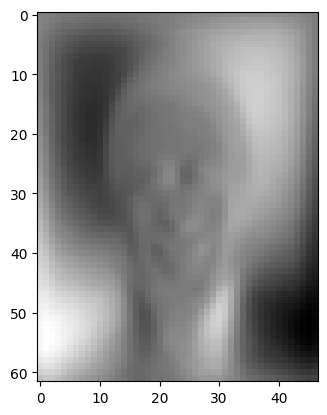

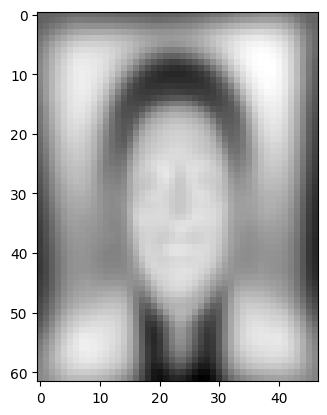

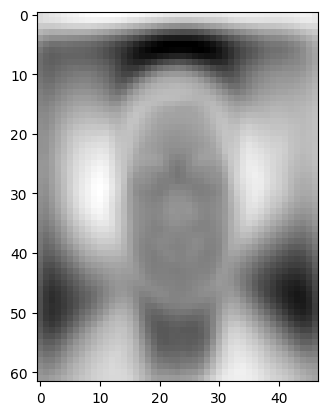

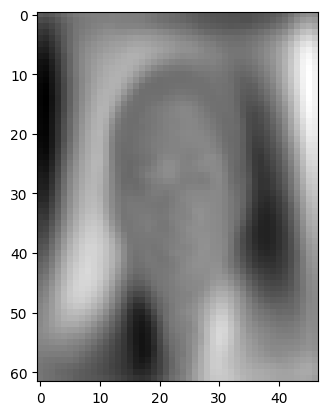

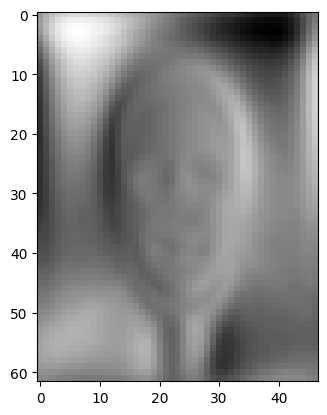

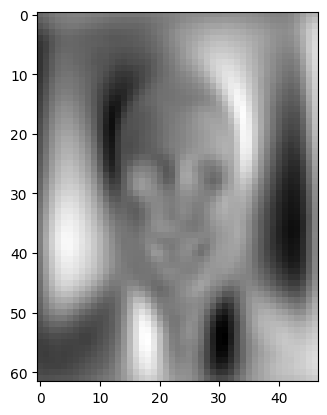

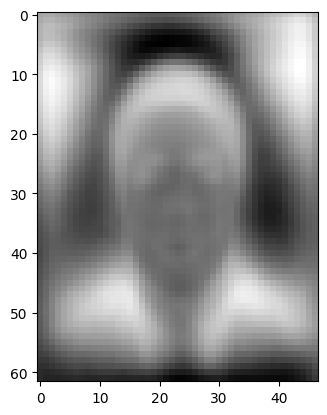

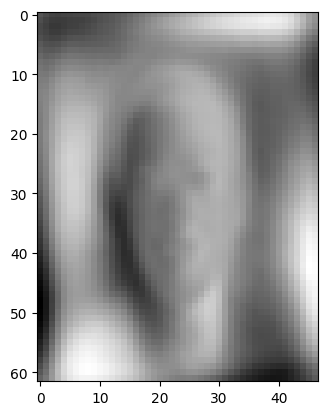

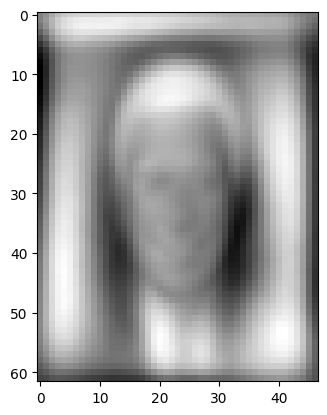

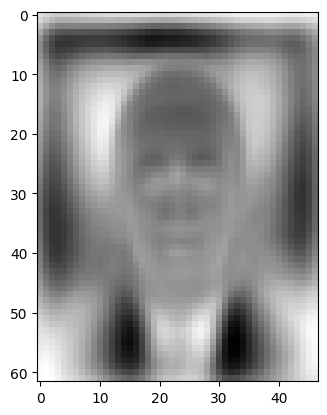

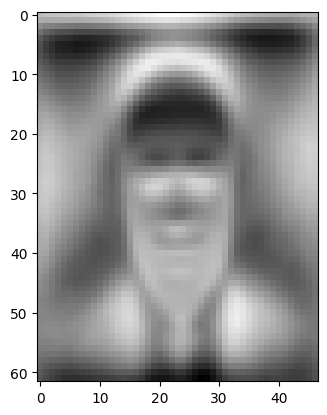

In [23]:
#1.d
for i in range(20):
        matplotlib.pyplot.imshow(eig_vectors[:,i].reshape(62,47), cmap=matplotlib.pyplot.cm.gray )
        matplotlib.pyplot.savefig(f'files/eigenface_nr.{i+1}.png')
        matplotlib.pyplot.show()

In [24]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

One can see that we need 75 PCDs to explain 95% of the variance.


Text(0.5, 1.0, 'Variance explained by number of PCDs')

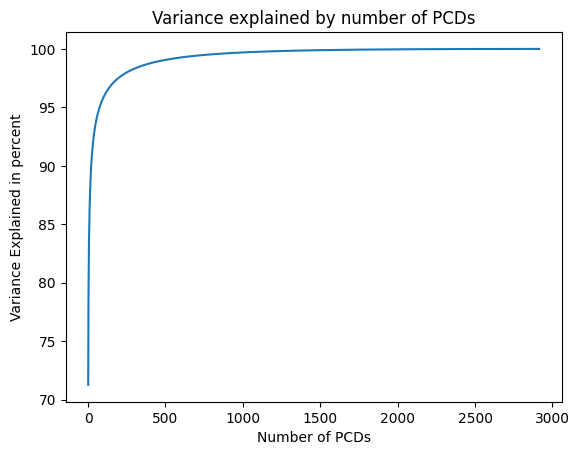

In [25]:
#1.e

explained_variances = []
for i in range(len(eig_values)):
    explained_variances.append(eig_values[i] / np.sum(eig_values)*100)
variance_explained_cum = np.cumsum(explained_variances)
k = 0
PCDs_needed=[]
for i in range(len(explained_variances)):
    k+=explained_variances[i]
    PCDs_needed.append(explained_variances[i])
    if k>95:
        break

print(f"One can see that we need {len(PCDs_needed)} PCDs to explain 95% of the variance.")
matplotlib.pyplot.plot(np.arange(1, X.shape[1] + 1, 1), variance_explained_cum)
matplotlib.pyplot.ylabel('Variance Explained in percent')
matplotlib.pyplot.xlabel('Number of PCDs')
matplotlib.pyplot.title('Variance explained by number of PCDs')

In [26]:
display(Latex(r"\newpage"))

<IPython.core.display.Latex object>

In [27]:
#1.f
#load X again since our previous X was centered
X = dataset['data']

X_train = X[:int(X.shape[0]*0.8)]
X_test = X[int(X.shape[0]*0.8):]

eig_vectors, eig_values, _  = np.linalg.svd(X_train.T@X_train)

idx = eig_values.argsort()[::-1]
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:, idx]

training_loss = []
test_loss = []

number_of_PCDs =  [10, 20, 50, 100, 500, 1000, 2914]

for k in number_of_PCDs:
    k_eig_vectors = np.zeros(eig_vectors.shape)
    k_eig_vectors[:,:k] = eig_vectors[:,:k]

    X_train_reconstruction = X_train @ k_eig_vectors @k_eig_vectors.T
    training_loss.append(1/(X_train.shape[0]*X_train.shape[1])*np.linalg.norm(X_train_reconstruction-X_train)**2)

    X_test_reconstruction = X_test @ k_eig_vectors @k_eig_vectors.T
    test_loss.append(1/(X_test.shape[0]*X_test.shape[1])*np.linalg.norm(X_test_reconstruction-X_test)**2)

    print(f"For {k} number of PCDs, the training loss was: {training_loss[-1]}, and the test loss was {test_loss[-1]} \n")


For 10 number of PCDs, the training loss was: 0.024876154512220056, and the test loss was 0.025062690624474873 

For 20 number of PCDs, the training loss was: 0.01832719678080922, and the test loss was 0.018420726054348077 

For 50 number of PCDs, the training loss was: 0.01145844974748309, and the test loss was 0.011592239534264808 

For 100 number of PCDs, the training loss was: 0.00749010035300871, and the test loss was 0.007688371896088376 

For 500 number of PCDs, the training loss was: 0.0016752821280762095, and the test loss was 0.001950320561979342 

For 1000 number of PCDs, the training loss was: 0.0005270785648694966, and the test loss was 0.0007230311720999202 

For 2914 number of PCDs, the training loss was: 2.313802221591989e-16, and the test loss was 2.8704234588938264e-16 



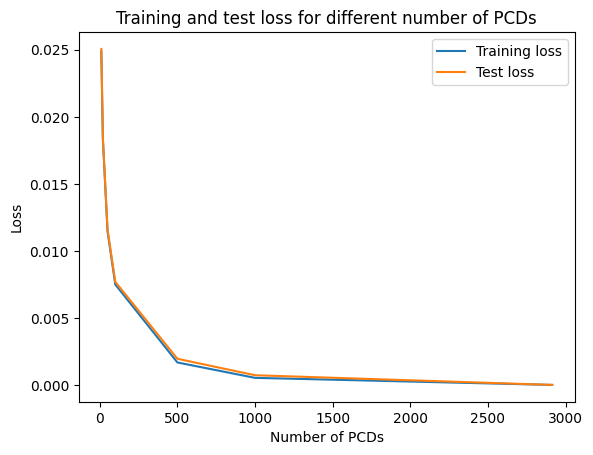

In [28]:
#1.f
#the plot
matplotlib.pyplot.plot(number_of_PCDs, training_loss, label = "Training loss")
matplotlib.pyplot.plot(number_of_PCDs, test_loss, label = "Test loss")
matplotlib.pyplot.title("Training and test loss for different number of PCDs")
matplotlib.pyplot.xlabel("Number of PCDs")
matplotlib.pyplot.ylabel("Loss")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

